# Linear Regression
This notebook performs basic linear regression on all data sets, as well as adding squared terms for the womens 100. 

In [1]:
import pandas as pd
import numpy as np
from math import sqrt

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew

from sklearn.linear_model    import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model    import RidgeCV
from sklearn.pipeline        import make_pipeline
from sklearn.preprocessing   import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.preprocessing   import StandardScaler
from sklearn.metrics         import mean_squared_error
from sklearn.linear_model    import Lasso
from sklearn                 import linear_model

## Womens 100 with Squared Terms

In [2]:
women100 = pd.read_csv("100_Women_Results.csv")
y = women100['Sr_PR']
X = women100
del X['Sr_PR']
del X['ID']
del X['Name']
del X['School_ID']
del X['School']
del X['Division']
del X['Grad_Yr']
del X['Unnamed: 0']

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [3]:
X1_train = X_train.copy()
X1_train['PR11squared'] = X_train['Jr_PR']**2
X1_train['PR10squared'] = X_train['So_PR']**2
X1_train['PR9squared'] = X_train['Fr_PR']**2

X1_test = X_test.copy()
X1_test['PR11squared'] = X_test['Jr_PR']**2
X1_test['PR10squared'] = X_test['So_PR']**2
X1_test['PR9squared'] = X_test['Fr_PR']**2


lr = LinearRegression()

lr.fit(X1_train,y_train)

print('Using squared terms as well to predict 12th grade PR')
print('Train R^2: ',lr.score(X1_train, y_train))
print('Train RMSE:', 
      sqrt(mean_squared_error(y_train, lr.predict(X1_train))))
print('Test R^2: ', lr.score(X1_test, y_test))
print('Test RMSE:', 
      sqrt(mean_squared_error(y_test, lr.predict(X1_test))))

Using squared terms as well to predict 12th grade PR
Train R^2:  0.778241080967144
Train RMSE: 0.24024493625611748
Test R^2:  0.8239845102476819
Test RMSE: 0.22020714622460713


# Linear Regression on the Women's 100m
Explore using all PR's, only freshman year, sophomore and junior year, freshman and sophomore year and only junior year

Womens 100m - all PR's

In [4]:
women100 = pd.read_csv("100_Women_Results.csv")
y = women100['Sr_PR']
X = women100
del X['Sr_PR']
del X['ID']
del X['Name']
del X['School_ID']
del X['School']
del X['Division']
del X['Grad_Yr']
del X['Unnamed: 0']

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [5]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [6]:
y_pred = lr.predict(X_test)

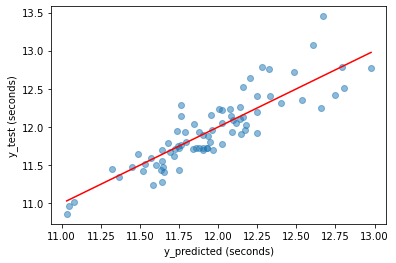

In [7]:
plt.scatter(y_pred,y_test,alpha=0.5);
plt.ylabel('y_test (seconds)');
plt.xlabel('y_predicted (seconds)');

plt.plot([max(y_pred),min(y_pred)],[max(y_pred),min(y_pred)],color='r')

In [8]:
print('Using all data to predict 12th grade PR')
print('Train R^2: ',lr.score(X_train, y_train))
print('Train RMSE:', 
      sqrt(mean_squared_error(y_train, lr.predict(X_train))))
print('Test R^2: ', lr.score(X_test, y_test))
print('Test RMSE:', 
        sqrt(mean_squared_error(y_test, lr.predict(X_test))))

Using all data to predict 12th grade PR
Train R^2:  0.7882887174286655
Train RMSE: 0.23890620494389544
Test R^2:  0.7680782022744985
Test RMSE: 0.22729317556095416


Use only Freshman Year results

Using Freshman PR only to predict Senior PR
Train R^2:  0.7805900649404316
Train RMSE: 0.24110252838905383
Test R^2:  0.8152602647720285
Test RMSE: 0.2141218839432329


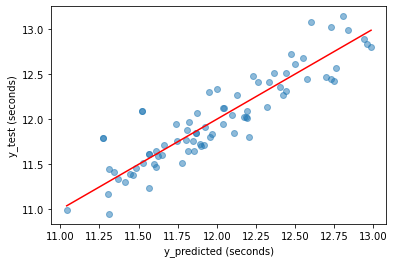

In [9]:
women100 = pd.read_csv("100_Women_Results.csv")
y = women100['Sr_PR']
X = women100
del X['Sr_PR']
del X['ID']
del X['Name']
del X['School_ID']
del X['School']
del X['Division']
del X['Grad_Yr']
del X['Unnamed: 0']

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

del X['So_PR']
del X['Jr_PR']


lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

plt.scatter(y_pred,y_test,alpha=0.5);
plt.ylabel('y_test (seconds)');
plt.xlabel('y_predicted (seconds)');

plt.plot([max(y_pred),min(y_pred)],[max(y_pred),min(y_pred)],color='r')


print('Using Freshman PR only to predict Senior PR')
print('Train R^2: ',lr.score(X_train, y_train))
print('Train RMSE:', 
      sqrt(mean_squared_error(y_train, lr.predict(X_train))))
print('Test R^2: ', lr.score(X_test, y_test))
print('Test RMSE:', 
        sqrt(mean_squared_error(y_test, lr.predict(X_test))))



Freshman and Sophomore Year

Using Freshman PR and Sophomore PR to predict Senior PR
Train R^2:  0.7806461767101043
Train RMSE: 0.24295351972533394
Test R^2:  0.8163137705643643
Test RMSE: 0.20134728969326757


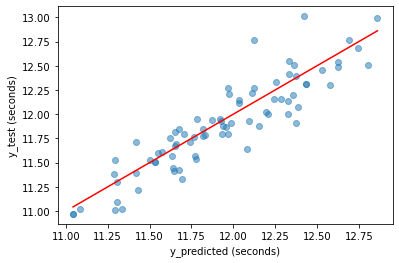

In [10]:
women100 = pd.read_csv("100_Women_Results.csv")
y = women100['Sr_PR']
X = women100
del X['Sr_PR']
del X['ID']
del X['Name']
del X['School_ID']
del X['School']
del X['Division']
del X['Grad_Yr']
del X['Unnamed: 0']

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

del X['Jr_PR']


lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

plt.scatter(y_pred,y_test,alpha=0.5);
plt.ylabel('y_test (seconds)');
plt.xlabel('y_predicted (seconds)');

plt.plot([max(y_pred),min(y_pred)],[max(y_pred),min(y_pred)],color='r')


print('Using Freshman PR and Sophomore PR to predict Senior PR')
print('Train R^2: ',lr.score(X_train, y_train))
print('Train RMSE:', 
      sqrt(mean_squared_error(y_train, lr.predict(X_train))))
print('Test R^2: ', lr.score(X_test, y_test))
print('Test RMSE:', 
        sqrt(mean_squared_error(y_test, lr.predict(X_test))))



Sophomore and Junior Year

Using Sophomor and Junior PR only to predict Senior PR
Train R^2:  0.7723786960997664
Train RMSE: 0.23875749386630385
Test R^2:  0.8429414639380982
Test RMSE: 0.2277085876946118


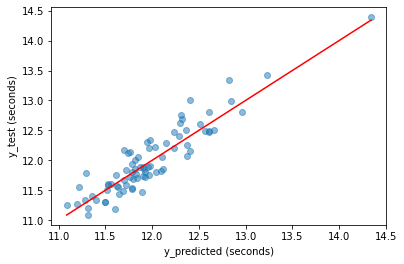

In [11]:
women100 = pd.read_csv("100_Women_Results.csv")
y = women100['Sr_PR']
X = women100
del X['Sr_PR']
del X['ID']
del X['Name']
del X['School_ID']
del X['School']
del X['Division']
del X['Grad_Yr']
del X['Unnamed: 0']

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

del X['Fr_PR']


lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

plt.scatter(y_pred,y_test,alpha=0.5);
plt.ylabel('y_test (seconds)');
plt.xlabel('y_predicted (seconds)');

plt.plot([max(y_pred),min(y_pred)],[max(y_pred),min(y_pred)],color='r')


print('Using Sophomor and Junior PR only to predict Senior PR')
print('Train R^2: ',lr.score(X_train, y_train))
print('Train RMSE:', 
      sqrt(mean_squared_error(y_train, lr.predict(X_train))))
print('Test R^2: ', lr.score(X_test, y_test))
print('Test RMSE:', 
        sqrt(mean_squared_error(y_test, lr.predict(X_test))))



Junior PR

Using Junior PR only to predict Senior PR
Train R^2:  0.7791671763724043
Train RMSE: 0.24029755132617756
Test R^2:  0.8220709379881616
Test RMSE: 0.21878366764940607


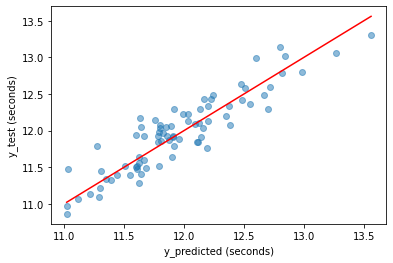

In [12]:
women100 = pd.read_csv("100_Women_Results.csv")
y = women100['Sr_PR']
X = women100
del X['Sr_PR']
del X['ID']
del X['Name']
del X['School_ID']
del X['School']
del X['Division']
del X['Grad_Yr']
del X['Unnamed: 0']

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

del X['So_PR']
del X['Fr_PR']


lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

plt.scatter(y_pred,y_test,alpha=0.5);
plt.ylabel('y_test (seconds)');
plt.xlabel('y_predicted (seconds)');

plt.plot([max(y_pred),min(y_pred)],[max(y_pred),min(y_pred)],color='r')


print('Using Junior PR only to predict Senior PR')
print('Train R^2: ',lr.score(X_train, y_train))
print('Train RMSE:', 
      sqrt(mean_squared_error(y_train, lr.predict(X_train))))
print('Test R^2: ', lr.score(X_test, y_test))
print('Test RMSE:', 
        sqrt(mean_squared_error(y_test, lr.predict(X_test))))



## Basic Linear Regression Predictions for all other events

In [13]:
Men100 = pd.read_csv("100_Men_Results.csv")
y = Men100['Sr_PR']
X = Men100
del X['Sr_PR']
del X['ID']
del X['Name']
del X['School_ID']
del X['School']
del X['Division']
del X['Grad_Yr']
del X['Unnamed: 0']

Using all data to predict Senior PR
Train R^2:  0.7145699216728477
Train RMSE: 0.22567259845104687
Test R^2:  0.8424486415750313
Test RMSE: 0.16175590552952615


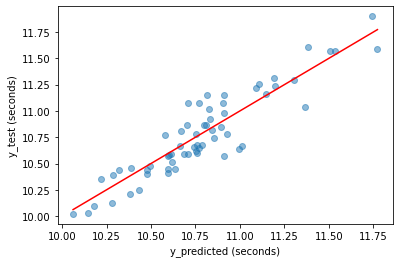

In [14]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

lr = LinearRegression()

lr.fit(X_train, y_train)


y_pred = lr.predict(X_test)

plt.scatter(y_pred,y_test,alpha=0.5);
plt.ylabel('y_test (seconds)');
plt.xlabel('y_predicted (seconds)');

plt.plot([max(y_pred),min(y_pred)],[max(y_pred),min(y_pred)],color='r')


print('Using all data to predict Senior PR')
print('Train R^2: ',lr.score(X_train, y_train))
print('Train RMSE:', 
      sqrt(mean_squared_error(y_train, lr.predict(X_train))))
print('Test R^2: ', lr.score(X_test, y_test))
print('Test RMSE:', 
        sqrt(mean_squared_error(y_test, lr.predict(X_test))))

In [15]:
Women5000 = pd.read_csv("5000_Women_Results.csv")
y = Women5000['Sr_PR']
X = Women5000
del X['Sr_PR']
del X['ID']
del X['Name']
del X['School_ID']
del X['School']
del X['Division']
del X['Grad_Yr']
del X['Unnamed: 0']

Using all data to predict Senior PR
Train R^2:  0.07882103163822274
Train RMSE: 170.8642116714409
Test R^2:  -0.80577838946847
Test RMSE: 91.30014712614253


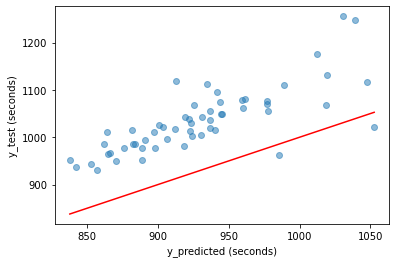

In [16]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

y_pred = lr.predict(X_test)

lr = LinearRegression()

lr.fit(X_train, y_train)



plt.scatter(y_pred,y_test,alpha=0.5);
plt.ylabel('y_test (seconds)');
plt.xlabel('y_predicted (seconds)');

plt.plot([max(y_pred),min(y_pred)],[max(y_pred),min(y_pred)],color='r')


print('Using all data to predict Senior PR')
print('Train R^2: ',lr.score(X_train, y_train))
print('Train RMSE:', 
      sqrt(mean_squared_error(y_train, lr.predict(X_train))))
print('Test R^2: ', lr.score(X_test, y_test))
print('Test RMSE:', 
        sqrt(mean_squared_error(y_test, lr.predict(X_test))))


In [17]:
Men5000 = pd.read_csv("5000_Men_Results.csv")
y = Men5000['Sr_PR']
X = Men5000
del X['Sr_PR']
del X['ID']
del X['Name']
del X['School_ID']
del X['School']
del X['Division']
del X['Grad_Yr']
del X['Unnamed: 0']

Using all data to predict Senior PR
Train R^2:  0.6576026677676992
Train RMSE: 26.22818767371309
Test R^2:  0.7401153701971054
Test RMSE: 25.305338623751442


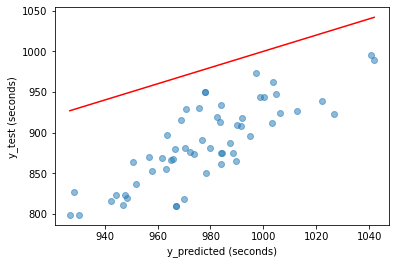

In [18]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

y_pred = lr.predict(X_test)

lr = LinearRegression()

lr.fit(X_train, y_train)



plt.scatter(y_pred,y_test,alpha=0.5);
plt.ylabel('y_test (seconds)');
plt.xlabel('y_predicted (seconds)');

plt.plot([max(y_pred),min(y_pred)],[max(y_pred),min(y_pred)],color='r')


print('Using all data to predict Senior PR')
print('Train R^2: ',lr.score(X_train, y_train))
print('Train RMSE:', 
      sqrt(mean_squared_error(y_train, lr.predict(X_train))))
print('Test R^2: ', lr.score(X_test, y_test))
print('Test RMSE:', 
        sqrt(mean_squared_error(y_test, lr.predict(X_test))))

Using all data to predict Senior PR
Train R^2:  0.9730522346424145
Train RMSE: 0.24849059269689372
Test R^2:  0.6966895043343695
Test RMSE: 0.18818680287760528


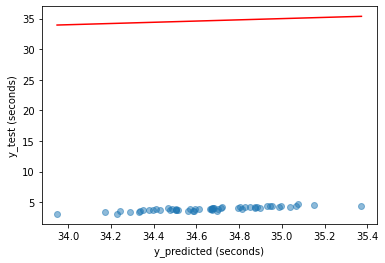

In [19]:
Men5000 = pd.read_csv("PV_Women_Results.csv")
y = Men5000['Sr_PR']
X = Men5000
del X['Sr_PR']
del X['ID']
del X['Name']
del X['School_ID']
del X['School']
del X['Division']
del X['Grad_Yr']
del X['Unnamed: 0']

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

y_pred = lr.predict(X_test)

lr = LinearRegression()

lr.fit(X_train, y_train)



plt.scatter(y_pred,y_test,alpha=0.5);
plt.ylabel('y_test (seconds)');
plt.xlabel('y_predicted (seconds)');

plt.plot([max(y_pred),min(y_pred)],[max(y_pred),min(y_pred)],color='r')


print('Using all data to predict Senior PR')
print('Train R^2: ',lr.score(X_train, y_train))
print('Train RMSE:', 
      sqrt(mean_squared_error(y_train, lr.predict(X_train))))
print('Test R^2: ', lr.score(X_test, y_test))
print('Test RMSE:', 
        sqrt(mean_squared_error(y_test, lr.predict(X_test))))

Using all data to predict Senior PR
Train R^2:  0.9845001231249613
Train RMSE: 0.2001346877654594
Test R^2:  0.9911589435964242
Test RMSE: 0.19004498279774926


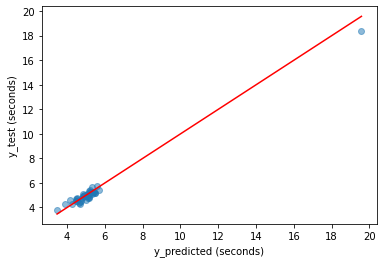

In [20]:
MenPV = pd.read_csv("PV_Men_Results.csv")
y = MenPV['Sr_PR']
X = MenPV
del X['Sr_PR']
del X['ID']
del X['Name']
del X['School_ID']
del X['School']
del X['Division']
del X['Grad_Yr']
del X['Unnamed: 0']

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

y_pred = lr.predict(X_test)

lr = LinearRegression()

lr.fit(X_train, y_train)



plt.scatter(y_pred,y_test,alpha=0.5);
plt.ylabel('y_test (seconds)');
plt.xlabel('y_predicted (seconds)');

plt.plot([max(y_pred),min(y_pred)],[max(y_pred),min(y_pred)],color='r')


print('Using all data to predict Senior PR')
print('Train R^2: ',lr.score(X_train, y_train))
print('Train RMSE:', 
      sqrt(mean_squared_error(y_train, lr.predict(X_train))))
print('Test R^2: ', lr.score(X_test, y_test))
print('Test RMSE:', 
        sqrt(mean_squared_error(y_test, lr.predict(X_test))))

Using all data to predict Senior PR
Train R^2:  0.9658913408816738
Train RMSE: 0.4620329451326231
Test R^2:  0.6268293521246009
Test RMSE: 0.46432218446966167


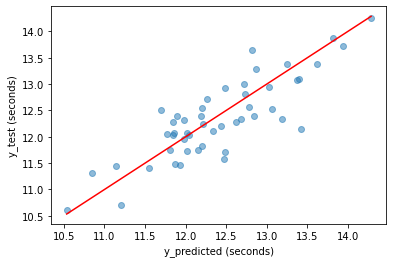

In [21]:
WTJ = pd.read_csv("TJ_Women_Results.csv")
y = WTJ['Sr_PR']
X = WTJ
del X['Sr_PR']
del X['ID']
del X['Name']
del X['School_ID']
del X['School']
del X['Division']
del X['Grad_Yr']
del X['Unnamed: 0']

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

y_pred = lr.predict(X_test)

lr = LinearRegression()

lr.fit(X_train, y_train)



plt.scatter(y_pred,y_test,alpha=0.5);
plt.ylabel('y_test (seconds)');
plt.xlabel('y_predicted (seconds)');

plt.plot([max(y_pred),min(y_pred)],[max(y_pred),min(y_pred)],color='r')


print('Using all data to predict Senior PR')
print('Train R^2: ',lr.score(X_train, y_train))
print('Train RMSE:', 
      sqrt(mean_squared_error(y_train, lr.predict(X_train))))
print('Test R^2: ', lr.score(X_test, y_test))
print('Test RMSE:', 
        sqrt(mean_squared_error(y_test, lr.predict(X_test))))

Using all data to predict Senior PR
Train R^2:  0.9853562173404029
Train RMSE: 0.6067435506335902
Test R^2:  0.5424647984270861
Test RMSE: 0.4996805126660851


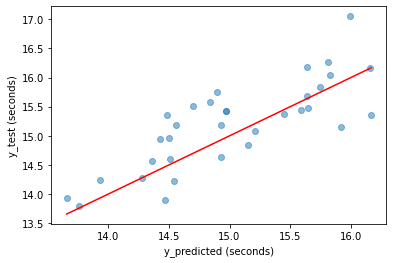

In [22]:
MTJ = pd.read_csv("TJ_Men_Results.csv")
y = MTJ['Sr_PR']
X = MTJ
del X['Sr_PR']
del X['ID']
del X['Name']
del X['School_ID']
del X['School']
del X['Division']
del X['Grad_Yr']
del X['Unnamed: 0']

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

y_pred = lr.predict(X_test)

lr = LinearRegression()

lr.fit(X_train, y_train)



plt.scatter(y_pred,y_test,alpha=0.5);
plt.ylabel('y_test (seconds)');
plt.xlabel('y_predicted (seconds)');

plt.plot([max(y_pred),min(y_pred)],[max(y_pred),min(y_pred)],color='r')


print('Using all data to predict Senior PR')
print('Train R^2: ',lr.score(X_train, y_train))
print('Train RMSE:', 
      sqrt(mean_squared_error(y_train, lr.predict(X_train))))
print('Test R^2: ', lr.score(X_test, y_test))
print('Test RMSE:', 
        sqrt(mean_squared_error(y_test, lr.predict(X_test))))